In [1]:
train_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\train"
valid_path = "C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\val"

In [2]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt


In [3]:
image_size = (224, 224)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"
)

Found 10000 images belonging to 10 classes.


In [6]:
valid_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"
)

Found 984 images belonging to 10 classes.


In [7]:
cnn = tf.keras.models.Sequential()

#Convolution layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#Convolution layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))

# Pooling 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn.summary()

# Fit
temp = cnn.fit(x = train_generator, validation_data=valid_generator,epochs=20)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)             

In [8]:
import numpy as np
from keras.preprocessing import image
test = image.load_img("C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\val\\Tomato___Bacterial_spot\\0c09c121-e945-4b7e-acbf-dff4e0d01acb___GCREC_Bact.Sp 3379.JPG",target_size = (150, 150))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn.predict(test)

predicted_class = np.argmax(result)

print(f"Predicted class index: {predicted_class}")

1/1 [==============================] - 0s 85ms/step
Predicted class index: 4


In [27]:
result

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

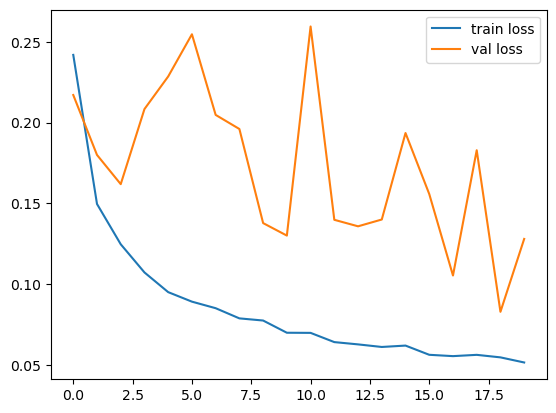

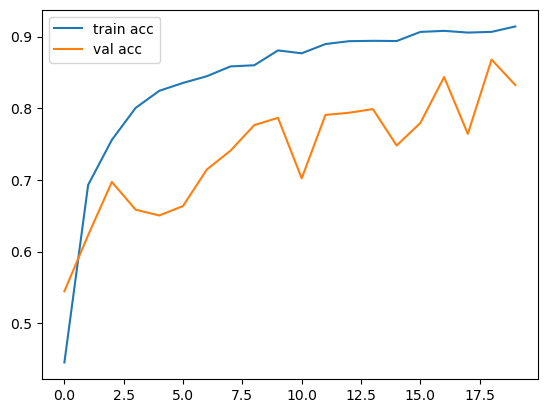

<Figure size 640x480 with 0 Axes>

In [28]:
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
import cv2
import numpy as np

# Load and preprocess the new image
image_path = 'C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\101.JPG'
img = cv2.imread(image_path)
img = cv2.resize(img, (150, 150))
img = img / 255.0  # Normalize pixel values

# Reshape the image to match the input shape expected by the model
img = np.reshape(img, (1, 150, 150, 3))

# Make predictions
predictions = cnn.predict(img)
print(predictions)
# Assuming you have 10 classes (units=10 in the output layer)
# Get the predicted class (index with the highest probability)
predicted_class = np.argmax(predictions)

print(f"Predicted class index: {predicted_class}")


1/1 [==============================] - 0s 19ms/step
[[1.3881259e-31 9.9820268e-01 3.6103324e-23 5.9176832e-21 1.7972428e-03
  6.1472756e-27 4.3740301e-34 5.6438363e-26 2.9976173e-16 1.3970006e-34]]
Predicted class index: 1


In [31]:
import numpy as np
from keras.preprocessing import image
test = image.load_img("C:\\Users\\Niranjan\\Documents\\Data mining\\archive (1)\\tomato\\101.JPG",target_size = (150, 150))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn.predict(test)

predicted_class = np.argmax(result)
print(result)
print(f"Predicted class index: {predicted_class}")

1/1 [==============================] - 0s 20ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Predicted class index: 4
